This is a simple betting game named "Guess the Dice Roll", Here, initially the gamer will get total 100 coins to play. And he/she have to guess the numbers within the range. If gamer selects correct number within the range, wins the game otherwise lose the game after 7 number of inputs.



In [12]:
#Load random library
import random

#define play_game functioin
def play_dice_game():
    total_num_coins = 100 #Here total number of  coins is 100
    max_guesses = 7 #Number of guesses is upto 7 times

    print("Let's play the Dice Roll!")
    #Initially the game informs the client total number of coins initially as 100
    print("You have", total_num_coins, "coins.") 

    #checking whether total_coins is greater than 0 or not. Coins cannot be less than 0
    while total_num_coins > 0:
        print("\nPlace your bet (or enter 0 to quit):")
        bet = int(input("Bet amount: "))

        if bet == 0:
            print("Thank you for playing! You are leaving with", total_num_coins, "coins.")
            break

        if bet > total_num_coins:
            print("Insufficient coins. Please place a lower bet.")
            continue

        print("Choose a range for the dice roll sum:")
        range_start = int(input("Range start: "))
        range_end = int(input("Range end: "))

        if range_start >= range_end:
            print("Invalid range. Please try valid number.")
            continue

        print("You have", max_guesses, "guesses remaining.")

        for _ in range(max_guesses):
            dice_roll = random.randint(1, 6) + random.randint(1, 6)
            print("Dice roll:", dice_roll)

            if range_start <= dice_roll <= range_end:
                payout = bet * 2
                total_num_coins += payout
                print("Wow!! Congratulations! You won", payout, "coins.")
                break
            else:
                total_num_coins -= bet
                print("Sorry, you lost", bet, "coins.")

            max_guesses -= 1
            if max_guesses > 0:
                print("You have", max_guesses, "guesses remaining.")
            else:
                print("You have used all your guesses. Game over!")
                break

        
        if total_num_coins <= 0:
            print("Game over! You have run out of coins.")
            break

        print("You now have", total_num_coins, "coins.")

play_dice_game()
           

Let's play the Dice Roll!
You have 100 coins.

Place your bet (or enter 0 to quit):
Bet amount: 44
Choose a range for the dice roll sum:
Range start: 45
Range end: 23
Invalid range. Please try valid number.

Place your bet (or enter 0 to quit):
Bet amount: 45
Choose a range for the dice roll sum:
Range start: 21
Range end: 25
You have 7 guesses remaining.
Dice roll: 3
Sorry, you lost 45 coins.
You have 6 guesses remaining.
Dice roll: 4
Sorry, you lost 45 coins.
You have 5 guesses remaining.
Dice roll: 11
Sorry, you lost 45 coins.
You have 4 guesses remaining.
Dice roll: 11
Sorry, you lost 45 coins.
You have 3 guesses remaining.
Dice roll: 6
Sorry, you lost 45 coins.
You have 2 guesses remaining.
Dice roll: 9
Sorry, you lost 45 coins.
You have 1 guesses remaining.
Dice roll: 10
Sorry, you lost 45 coins.
You have used all your guesses. Game over!
Game over! You have run out of coins.


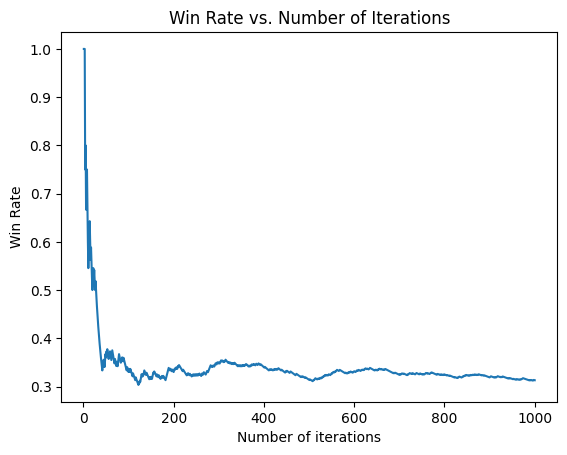

Monte Carlo simulation results:
Number of iterations: 1000
Wins: 313
Losses: 687


In [13]:
import random
import matplotlib.pyplot as plt

def simulate_game(num_iterations):
    total_coins = 100
    max_guesses = 7
    wins = 0
    losses = 0
    win_rates = []

    for i in range(1, num_iterations + 1):
        current_coins = total_coins
        current_guesses = max_guesses

        while current_coins > 0 and current_guesses > 0:
            bet = random.randint(1, current_coins)

            range_start = random.randint(2, 10)
            range_end = random.randint(range_start + 1, 12)

            for _ in range(current_guesses):
                dice_roll = random.randint(1, 6) + random.randint(1, 6)

                if range_start <= dice_roll <= range_end:
                    current_coins += bet * 2
                    break
                else:
                    current_coins -= bet

            current_guesses -= 1

        if current_coins > total_coins:
            wins += 1
        else:
            losses += 1

        win_rate = wins / i
        win_rates.append(win_rate)

    # Plotting the win rate
    plt.plot(range(1, num_iterations + 1), win_rates)
    plt.xlabel("Number of iterations")
    plt.ylabel("Win Rate")
    plt.title("Win Rate vs. Number of Iterations")
    plt.show()

    print("Monte Carlo simulation results:")
    print("Number of iterations:", num_iterations)
    print("Wins:", wins)
    print("Losses:", losses)

# Run the simulation with 1000 iterations and plot the win rate
simulate_game(1000)


In above code, after each iteration, the gamer will win or lose will be calculated which is save or stored in list of win_rates.

Then, the above plot is given showing number of iterations versus win rate.
Here, the number of iterations is upto 1000, total wins is 313 and losses is 687.

